# Product Data Analysis
<h2>Introduction</h2>
This notebook presents a comprehensive analysis of a product dataset, aimed at deriving actionable insights for data-driven decision-making. The dataset includes detailed information about various products, such as their names, IDs, categories, prices, publication types, and geographical locations. The primary objectives are to explore the dataset, identify unique values, address missing data, and prepare a clean dataset for further analysis. This project demonstrates data preprocessing, exploratory data analysis (EDA), and visualization techniques using Python.

<h2> Dataset Overview</h2>

The dataset consists of the following columns:
- **Product_name**: The name of the product.
- **Product_id**: A unique identifier for each product.
- **Product_Category**: The category to which the product belongs.
- **price**: The price of the product.
- **Professional_Publication**: Indicates whether the product is published by a professional or private entity.
- **Region_address**: The region where the product is available.
- **Local_address**: The local address within the region.
<p>The analysis focuses on understanding the dataset's structure, assessing data quality, and preparing it for downstream applications.

## Exploratory Data Analysis (EDA)
1. Loading the Dataset<p>
    <p>The dataset is loaded from a CSV file using the <code>pandas</code> library with appropriate encoding to handle special characters.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('ProductsData.csv', encoding='latin-1')

2. **Data Inspection**:<p> We inspect the first few rows of the dataset to understand its structure and content.

In [30]:
df.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,"""chambre a coucher ""","""40008817""","""Meubles et décoration """,1 800,"""private""","""Grand Casablanca""","""Casablanca"""
1,"""Comte free fire""","""40008816""","""Jeux vidéo et consoles """,,"""private""","""Grand Casablanca""","""Casablanca"""
2,"""Iphone 6 plus""","""40008815""","""Téléphones """,,"""private""","""Grand Casablanca""","""Casablanca"""
3,"""Renault ""","""40008814""","""Voitures """,,"""private""","""Chaouia-Ouardigha""","""Settat"""
4,"""PS3 SLIM 360 GB ""","""40008812""","""Jeux vidéo et consoles """,1 400,"""private""","""Rabat-Salé-Zemmour-Zaër""","""Sala Al-Jadida"""


3. **Descriptive Statistics**: <p> Descriptive statistics summarize the dataset’s key attributes, including counts, unique values, and frequencies.

In [31]:
data = df.copy()
data.describe()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
count,4350,4350,4350,3580,4350,4350,4350
unique,3407,3739,45,529,2,16,124
top,"""Renault""","""39235089""","""Voitures """,,"""private""","""Grand Casablanca""","""Casablanca"""
freq,18,3,654,451,2688,1355,1272


**Data Types:**

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              4350 non-null   object
 1   Product_id                4350 non-null   object
 2   Product_Category          4350 non-null   object
 3   price                     3580 non-null   object
 4   Professional_Publication  4350 non-null   object
 5   Region_address            4350 non-null   object
 6   Local_address             4350 non-null   object
dtypes: object(7)
memory usage: 238.0+ KB


### Observations:

- The dataset contains 4,350 entries.
- The price column has 770 missing values (4,350 - 3,580).
- All columns are of type object, indicating potential data cleaning needs (e.g., converting price to numeric).

## Data Preprocessing
4. **Cleaning the Dataset**<p>
**Step 1: Removing Quotation Marks**<p>
- Most columns contain unnecessary quotation marks, which are removed to improve readability and consistency.

In [35]:
for i,col in enumerate(data.columns):
   data.iloc[:,i]=data.iloc[:,i].str.replace('"','')
   
data.head(5)

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Step 2: Standardizing the <code>price</code> Column**<p>
- The <code>price</code> column contains extra spaces and missing values. Spaces are removed, and further handling of missing values is addressed later.

In [36]:
data['price'] = data['price'].str.replace(' ', '')
data.head()

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida


**Step 3 - Replacing Whitespace with NaN**<p>
- Whitespace or empty cells are replaced with NaN to standardize missing value representation across the dataset.

In [38]:
data = data.replace(r'^\s*$', np.nan, regex=True)
data

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
...,...,...,...,...,...,...,...
4345,XN-C11,39234529,Instruments de musique,90,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20000,private,Grand Casablanca,Mohammedia
4347,???? ????????? ????? ????,39234526,Matériels professionnels,NaN,pro,Grand Casablanca,Casablanca
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et bébé,1850,private,Tanger-Tétouan,Tanger


**Step 4 - Handling Question Marks in <code>Product_name</code>**<p>
- Some entries in the <code>Product_name</code> column contain question marks (<code>?</code>), which are likely errors. These are replaced with <code>NaN</code> to mark them as missing values.

In [39]:
data['Product_name'] = data['Product_name'].apply(lambda x: np.nan if str(x).find('?')>-1 else x)
data

,Product_name,Product_id,Product_Category,price,Professional_Publication,Region_address,Local_address
0,chambre a coucher,40008817,Meubles et décoration,1800,private,Grand Casablanca,Casablanca
1,Comte free fire,40008816,Jeux vidéo et consoles,NaN,private,Grand Casablanca,Casablanca
2,Iphone 6 plus,40008815,Téléphones,NaN,private,Grand Casablanca,Casablanca
3,Renault,40008814,Voitures,NaN,private,Chaouia-Ouardigha,Settat
4,PS3 SLIM 360 GB,40008812,Jeux vidéo et consoles,1400,private,Rabat-Salé-Zemmour-Zaër,Sala Al-Jadida
...,...,...,...,...,...,...,...
4345,XN-C11,39234529,Instruments de musique,90,private,Chaouia-Ouardigha,Khouribga
4346,Uno,39234527,Voitures,20000,private,Grand Casablanca,Mohammedia
4347,NaN,39234526,Matériels professionnels,NaN,pro,Grand Casablanca,Casablanca
4348,Poussette Bugaboo cameleon 3 black,39234524,Equipements pour enfant et bébé,1850,private,Tanger-Tétouan,Tanger


**Step 5 - Identifying Unique and Missing Values**<p>
- The number of unique values and missing values in each column is calculated to assess data quality.

In [40]:
categorical = data.select_dtypes(['category', 'object']).columns 
for col in categorical:
    print('{} : {} unique value(s)'.format(col, data[col].nunique()))

Product_name : 3180 unique value(s)
Product_id : 3739 unique value(s)
Product_Category : 45 unique value(s)
price : 525 unique value(s)
Professional_Publication : 2 unique value(s)
Region_address : 16 unique value(s)
Local_address : 124 unique value(s)


In [41]:
missing_values = data.isnull().sum()
print(missing_values[:7])

Product_name                 380
Product_id                     0
Product_Category               0
price                       1221
Professional_Publication       0
Region_address                 0
Local_address                  0
dtype: int64


**Observations**
- Now that we know that only the <code>Price</code> column has around 1221 and <code>Product_Name</code> has 380 missing values, so we will be dropping these rows as we dont want to assign zero or an avg value as there are various kinds of products in our dataset and we cannot skew the data by giving unknown values to products.

In [42]:
#Lets drop the rows with missing values and then verify if there are any missing values left
data = data.dropna()
print(data.isnull().sum())
print('_________________________________________________________')
print(data.info())

Product_name                0
Product_id                  0
Product_Category            0
price                       0
Professional_Publication    0
Region_address              0
Local_address               0
dtype: int64
_________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 2894 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product_name              2894 non-null   object
 1   Product_id                2894 non-null   object
 2   Product_Category          2894 non-null   object
 3   price                     2894 non-null   object
 4   Professional_Publication  2894 non-null   object
 5   Region_address            2894 non-null   object
 6   Local_address             2894 non-null   object
dtypes: object(7)
memory usage: 180.9+ KB
None


## Data Visualisation
<p> Plot the count of each product category to understand the distribution of products across different categories.

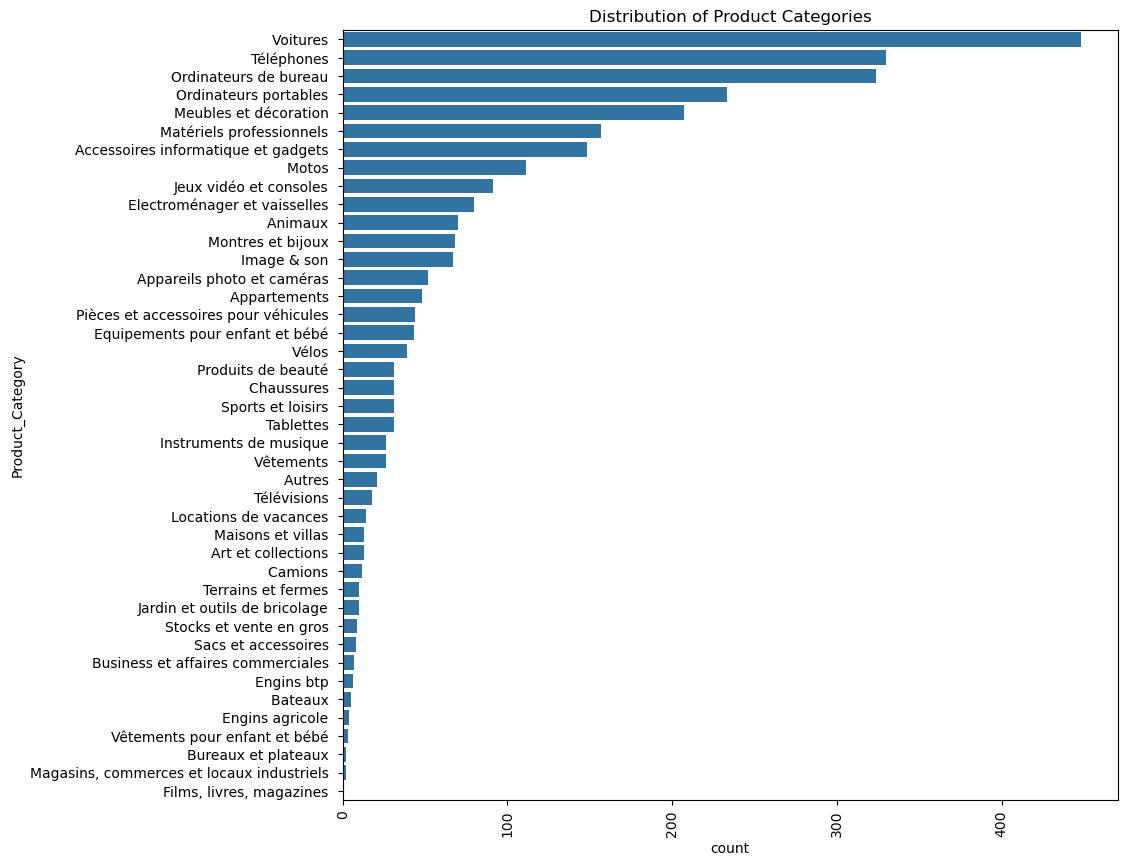

In [58]:
plt.figure(figsize=(10, 10))
sns.countplot(data=data, y='Product_Category', order=data['Product_Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Product Categories')
plt.show()

The chart below shows the top 10 most expensive products in the dataset, highlighting their prices.

C:\Users\borol\AppData\Local\Temp\ipykernel_22640\3140407568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype(float)


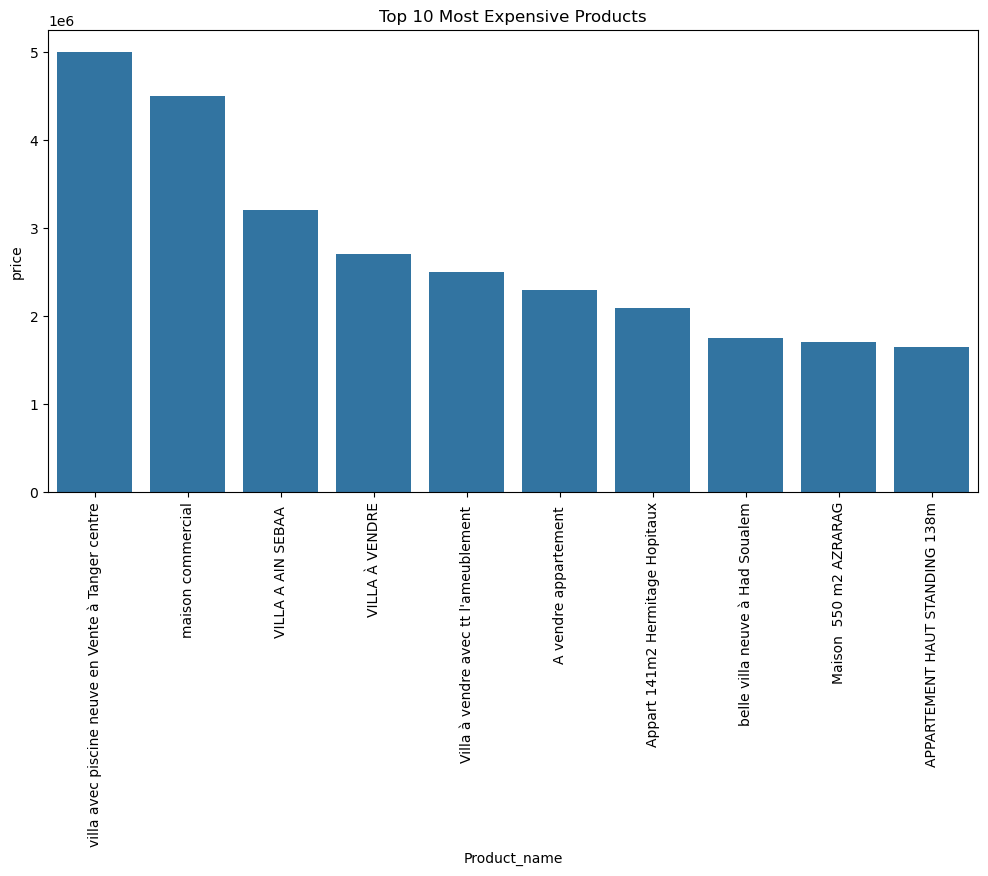

In [62]:
data['price'] = data['price'].astype(float)
top_10_expensive = data.nlargest(10, 'price')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_expensive, x='Product_name', y='price')
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Products')
plt.show()

The chart below illustrates the distribution of products across different local addresses within the regions. This visualization helps to identify the concentration of products in specific local areas, providing insights into regional product availability and potential market hotspots.

c:\Users\borol\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


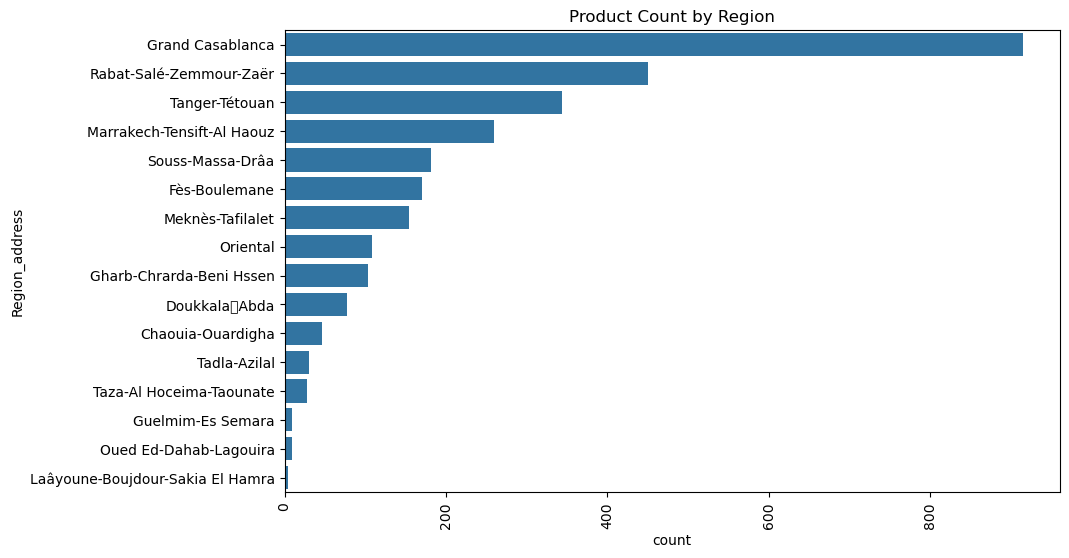

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Region_address', order=data['Region_address'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Product Count by Region')
plt.show()

The chart below illustrates the distribution of products based on whether they are published by professional or private entities. This visualization helps to understand the proportion of products that are professionally published compared to those published by private individuals. It provides insights into the market dynamics and the role of professional publications in the product dataset.

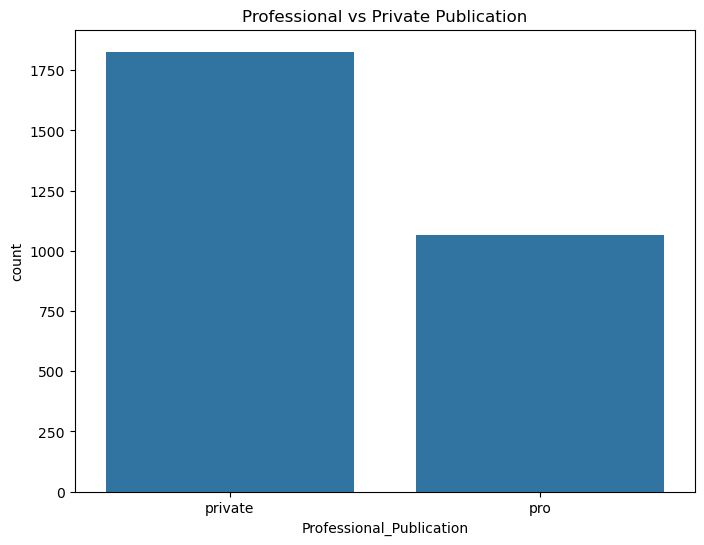

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Professional_Publication')
plt.title('Professional vs Private Publication')
plt.show()

## Conclusion
- This analysis transformed a raw product dataset of 4,350 entries into a clean dataset of 2,970 entries through systematic preprocessing steps:

- Removed quotation marks and standardized the price column.
Replaced whitespace and question marks with NaN.
Dropped rows with missing values in price (1,221) and Product_name (380) to ensure data integrity.
Key findings include:

- A diverse set of 45 product categories, with "Voitures" being the most frequent (originally 654 entries).
A strong regional focus in Grand Casablanca (originally 1,355 entries).
Predominance of private sellers, as confirmed by the visualization.